# Clasificatoare masini cu vectori suport (SVM) 

In [1]:
# Importing the libraries
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from tabulate import tabulate # pip install tabulate
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
# print sns.get_dataset_names()

def EvalModelCls(y_a, y_a_pred, y_b, y_b_pred, ta, tb):
    acc_a = np.round(metrics.accuracy_score(y_a, y_a_pred),5)
    acc_b =np.round(metrics.accuracy_score(y_b, y_b_pred),5)
    cf_a = metrics.confusion_matrix(y_a, y_a_pred)
    cf_b = metrics.confusion_matrix(y_b, y_b_pred)
    
    print('\n  Evaluare clasificare:  \n')
    tabel = []
    for i in range (0,cf_a.shape[0]):
        tabel.append([str(cf_a[i,:]), str(cf_b[i,:])])
    headers=[ta+", Accuracy: "+str(acc_a)+",\n Confusion Matrix: ", 
             tb+", Accuracy: "+str(acc_b)+",\n Confusion Matrix: "]
    print(tabulate(tabel, headers, colalign=("center","center")))
    return [acc_a, acc_b, cf_a, cf_b]  

def afisareFloriIrisUrl(afFloriIris):
    if (afFloriIris):
        from skimage import io
        
        url_setosa = io.imread('http://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg')
        url_versicolor = io.imread('http://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg')
        url_virginica = io.imread('http://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg')
         
        fig = plt.figure(figsize=(16,8)); 
        fig.add_subplot(1,3,1); plt.imshow(url_setosa); 
        fig.add_subplot(1,3,2); plt.imshow(url_versicolor);
        fig.add_subplot(1,3,3); plt.imshow(url_virginica);
        plt.show();


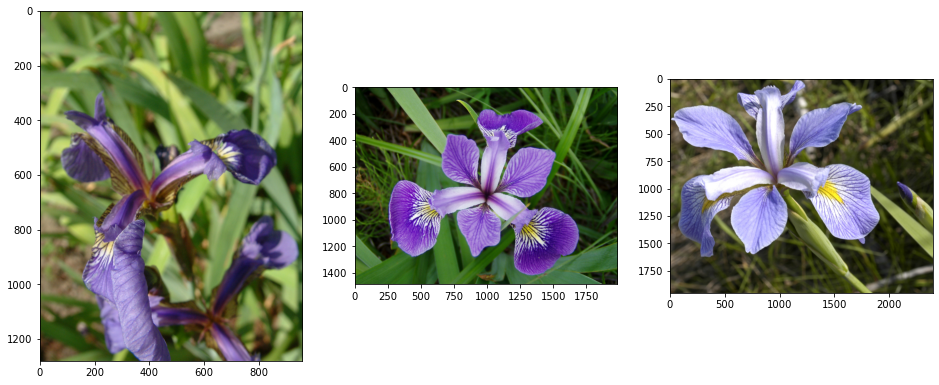

<Figure size 1152x144 with 0 Axes>

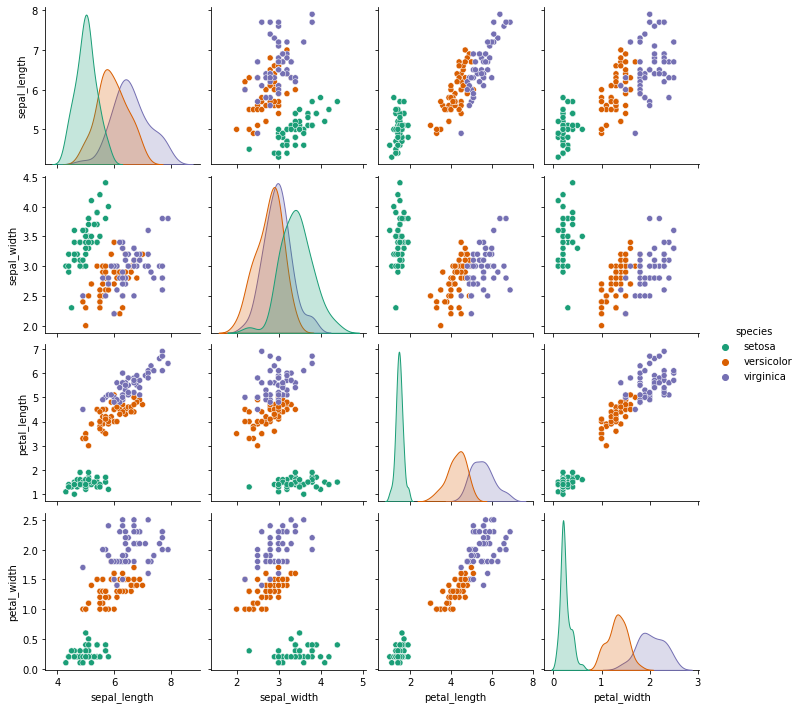

In [3]:
# In[1] # Importing the dataset

iris = sns.load_dataset('iris')
afFloriIrisPlot = True # True / False
if (afFloriIrisPlot):
    # Afisare care un exemplu de floare de iris din fiecare clasa
    afisareFloriIrisUrl(True); # parametru True daca vrem sa afisam
    
    # Plot vizualizare trasaturi 
    fig = plt.figure(figsize=(16,2))
    sns.pairplot(iris,hue='species',palette='Dark2')
    plt.show() # Setosa is the most separable. 



In [4]:
# In[] Formare setul de date: X, y
X = iris.drop('species',axis=1); 
target_names = np.unique(iris['species']); # numele florilor de iris diferite

# Etichetare cu valori numerice a claselor 
y = np.zeros(X.shape[0],).astype(int);
y[iris['species']=='setosa'] = 0
y[iris['species']=='versicolor'] = 1
y[iris['species']=='virginica'] = 2

print('\n Flori de iris, clasele: ', target_names)
print(' Set date, X.shape ', X.shape)

# Setare numar de imagini care vor fi considerate la testare 
# (retul imaginilor vor fi utilizare la antrenare)
test_size = 0.5     # 0.3 / 0.5 / 0.7 
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(' Setul de date este impartit in: ', X_train.shape[0],' train',  X_test.shape[0],' test' )
# In[] Aplicare SVM pe florile de Iris reprezentate prin 2 trasaturi


 Flori de iris, clasele:  ['setosa' 'versicolor' 'virginica']
 Set date, X.shape  (150, 4)
 Setul de date este impartit in:  75  train 75  test


In [5]:
# from sklearn import decomposition
# Reducere vector de trasaturi la 2 prin aplicare PCA
# pca = decomposition.PCA(n_components=2, whiten=True)
# pca.fit(X_train) 
# X_train_2D = pca.transform(X_train)
# X_test_2D = pca.transform(X_test)

# Setare doua valori din vectorul de trasaturi
trExtr = np.array([0,2])  
# Extragerea din matricea X doar a coloanelor cu trasaturile selectate 
X_train_2D = X_train[:,trExtr]
X_test_2D = X_test[:,trExtr]

 Model SVM - kernel: linear , gamma: scale , C:  1.0 , degree:  3

  Evaluare clasificare:  

 Train Set, Accuracy: 0.97333,    Test Set, Accuracy: 0.94667,
       Confusion Matrix:               Confusion Matrix:
-------------------------------  ------------------------------
          [29  0  0]                       [21  0  0]
          [ 0 19  1]                       [ 0 29  1]
          [ 0  1 25]                       [ 0  3 21]


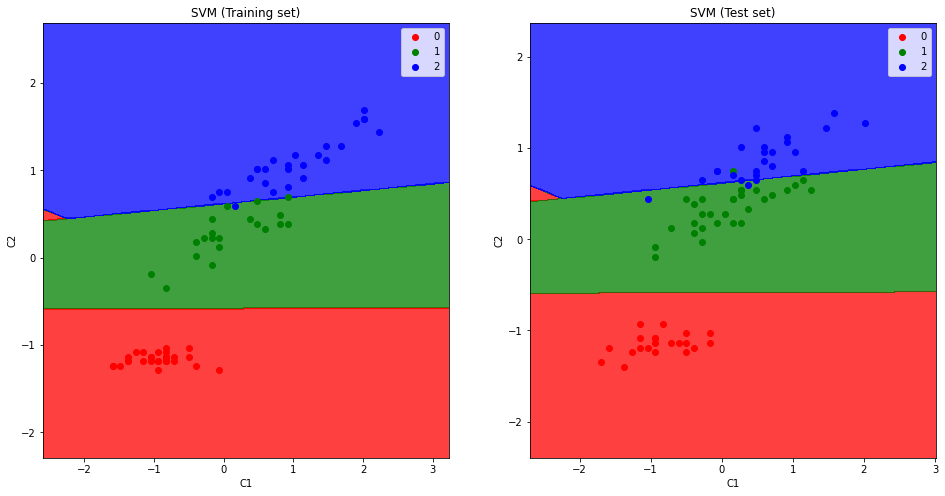

In [6]:
opt_par_svm = False; # True or False
if (not(opt_par_svm)):
    nkernel =  'linear' #  'linear','poly', 'rbf'
    model_svm_2D = SVC(kernel = nkernel, random_state = 0)
    model_svm_2D.fit(X_train_2D, y_train)
    print(' Model SVM - kernel:', model_svm_2D.kernel,', gamma:', model_svm_2D.gamma,
          ', C: ', model_svm_2D.C,', degree: ', model_svm_2D.degree)
else: 
    print(' S-a ales optimizare parametri SVM !!!!')
    param_grid = {'kernel':['linear', 'rbf','poly'], 
                  'degree':[2,3],
                  'C': [0.1,1, 10, 100], 
                  'gamma': [100, 10,1,0.1,0.01,0.001]} 
    model_svm_2D = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
    model_svm_2D.fit(X_train_2D, y_train)
    print(' Parametrii optimi obtinuti: ', model_svm_2D.best_params_)

# model_svm_2D = OneVsRestClassifier(SVC(kernel = nkernel,random_state = 0))
# model_svm_2D = OneVsOneClassifier(SVC(kernel = nkernel,random_state = 0))

# Aplicare model pe setul de la Train si Test
y_pred_trn = model_svm_2D.predict(X_train_2D)
y_pred_tst = model_svm_2D.predict(X_test_2D)


evRez = EvalModelCls(y_train, y_pred_trn,  y_test, y_pred_tst,
                    "Train Set", "Test Set")

if (X_train_2D.shape[1]==2): # se afiseaza doar daca vectorul de trasaturi este 2 
    # Visualising the Training set results
    from matplotlib.colors import ListedColormap
    clListAll = ['red', 'green', 'blue', 'm', 'y'] #, 'blue', 'yellow'
    clList=clListAll[0:max(y)+1]
    fig = plt.figure(figsize=(16,8))
    for ds in range(0,2): # se va afisa pentru setul de Train si Test
        fig.add_subplot(1,2,ds+1)
        if (ds == 0 ): # se va afisa setul de Train
            X_set, y_set = X_train_2D, y_train;
            plt.title('SVM (Training set)');
        else: # se va afisa setul de la Test
            X_set, y_set = X_test_2D, y_test
            plt.title('SVM (Test set)')
        
        X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                             np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
        plt.contourf(X1, X2, model_svm_2D.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                     alpha = 0.75, cmap = ListedColormap((clList)))
        plt.xlim(X1.min(), X1.max())
        plt.ylim(X2.min(), X2.max())
        for i, j in enumerate(np.unique(y_set)):
            plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = clList[i], label = j)
        plt.xlabel('C1'); plt.ylabel('C2'); plt.legend();
    
    plt.show()


 ---------------------------------- 
 Afisare proiectii 1D a imaginilor 
  * fiecare clasa pe culoare diferita - reprezentare usor deplasata pentru vizibilitate  
       - sus setul de imagini de la antrenare (reprezentat prin stea) 
       - jos setul de imagini de la de testare (reprezentat prin punct)


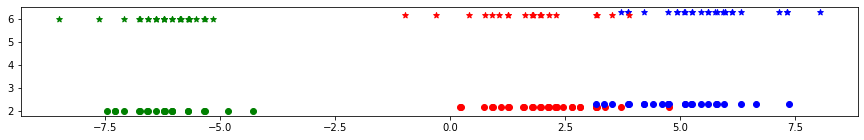


  Evaluare clasificare:  

 Train Set, Accuracy: 0.97333,    Test Set, Accuracy: 0.94667,
       Confusion Matrix:               Confusion Matrix:
-------------------------------  ------------------------------
          [29  0  0]                       [21  0  0]
          [ 0 19  1]                       [ 0 29  1]
          [ 0  1 25]                       [ 0  3 21]


In [7]:
ldaDo = True # true False
if (ldaDo):
    lda = LDA(n_components = 1)
    X_train_lda = lda.fit_transform(X_train_2D, y_train)
    X_test_lda = lda.transform(X_test_2D)
 
    print('\n ---------------------------------- ')
    print(' Afisare proiectii 1D a imaginilor ')
    print('  * fiecare clasa pe culoare diferita - reprezentare usor deplasata pentru vizibilitate  ')
    print('       - sus setul de imagini de la antrenare (reprezentat prin stea) ')
    print('       - jos setul de imagini de la de testare (reprezentat prin punct)')
    
    clabel = ['g','r', 'b', 'm']
    fig = plt.figure(figsize=(15,2))
    
    for i in range(0,X_test_lda.shape[0]):
        plt.scatter(X_test_lda[i,0],2+0.15*y_test[i], c=clabel[y_test[i]], marker='o')
    
    # fig = plt.figure(figsize=(15,1))
    for i in range(0,X_train_lda.shape[0]):
        plt.scatter(X_train_lda[i,0],6+0.15*y_train[i], c=clabel[y_train[i]], marker='*')
    
    plt.show()
    
evRez = EvalModelCls(y_train, y_pred_trn,  y_test, y_pred_tst,
                    "Train Set", "Test Set")